In [2]:
cd /content/drive/My Drive/DL/CS 189/hw4

/content/drive/My Drive/DL/CS 189/hw4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

np.random.seed(1)

## Loading dataset

In [2]:
data = loadmat('data/data.mat')
Num = data['X'].shape[0]
shuffle = np.random.permutation(Num)
train_x, train_y = data["X"][shuffle], data['y'][shuffle]
train_x = np.hstack((train_x, np.ones(6000).reshape(6000, 1)))
train_x = train_x / np.linalg.norm(train_x, axis=0)[np.newaxis, :]
val_x, val_y = train_x[:1000], train_y[:1000]
train_x, train_y = train_x[1000:], train_y[1000:]

## **Gradient Decent**

Let 
$$
J(w)=\lambda|w|^{2}-\sum_{i=1}^{n}\left( y_{i}\ln s(X_{i}^{T}w)+(1-y_{i})\ln (1-s(X_{i}^{T}w)) \right)
$$
Then
$$
\nabla_{w}J=2\lambda w - X^{T}(y-s(Xw))
$$
The update step is 
$$
w\leftarrow w+\varepsilon(X^{T}(y-s(Xw))-2\lambda w)
$$
where
$$
s(x)=\dfrac{1}{1+e^{-x}}
$$

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def classify(X,w):
  r = np.array([sigmoid(np.dot(X[i],w)) for i in X.shape[0]])
  return r.astype(np.int)

def cost(X,Y,w,Lambda=1e-4):
  c1 = Lambda * np.dot(w.T,w)
  c2 = 0
  for i in range(Y.shape[0]):
    x, y = X[i].T,Y[i]
    if y == 1:
      c2 += y * np.log(sigmoid(np.dot(x,w)))
    elif y == 0:
      c2 += (1-y)*np.log(1-sigmoid(np.dot(x,w)))
  return np.float(c1-c2)

Final train cost: 404.1319129875469
Final val cost: 131.39194768727904


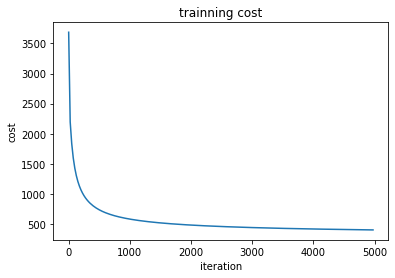

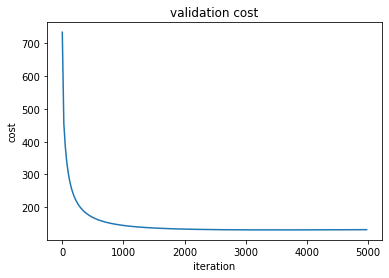

In [4]:
def batch_alg(X, Y, X_val, Y_val):
  Epsilon = 0.1
  Lambda = 1e-4
  w = np.ones(13).reshape(13,1)
  train_cost_list, val_cost_list,iteration = [], [], []
  iteration.append(0)
  train_cost_list.append(cost(X,Y,w))
  val_cost_list.append(cost(X_val, Y_val, w))
  for it in range(1,5000):
    s_list = []
    for i in range(X.shape[0]):
      s_list.append(sigmoid(np.dot(X[i].T,w)))
    s_list = np.array(s_list).reshape(X.shape[0],1)
  
    w = w + Epsilon*(np.dot(X.T,Y-s_list) - 2*Lambda*w)
    if it%25 == 0:
      iteration.append(it)
      train_cost_list.append(cost(X,Y,w))
      val_cost_list.append(cost(X_val, Y_val, w))
  print("Final train cost: {}".format(train_cost_list[-1]))
  print("Final val cost: {}".format(val_cost_list[-1]))

  fig1 = plt.figure()
  plt.plot(iteration, train_cost_list)
  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.title('trainning cost')
  plt.show()

  fig2 = plt.figure()
  plt.plot(iteration, val_cost_list)
  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.title('validation cost')
  plt.show()
batch_alg(train_x, train_y, val_x, val_y)

## **Stochastic Gradient Descent**

Let 
$$
J(w)=\lambda|w|^{2}-\sum_{i=1}^{n}\left( y_{i}\ln s(X_{i}^{T}w)+(1-y_{i})\ln (1-s(X_{i}^{T}w)) \right)
$$
Then
$$
\nabla_{w}J=2\lambda w - X^{T}(y-s(Xw))
$$
The update step is 
$$
w\leftarrow w+\varepsilon(X_{i}^{T}(y_{i}-s(X_{i}w))-2\lambda w)
$$
where
$$
s(x)=\dfrac{1}{1+e^{-x}}
$$

Final train cost: 2621.4418983338783
Final val cost: 536.1975986303186


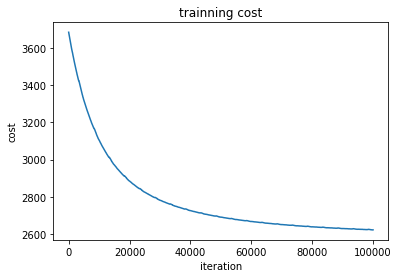

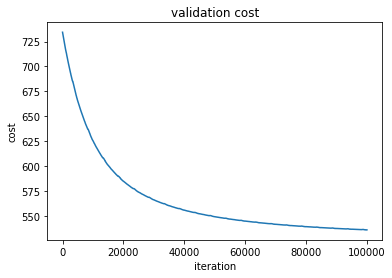

In [5]:
def batch_alg_sto(X, Y, X_val, Y_val, vary_eps=False):
  Epsilon = 0.1
  Lambda = 1e-4
  w = np.ones(13).reshape(13,1)
  train_cost_list, val_cost_list,iteration = [], [], []
  iteration.append(0)
  train_cost_list.append(cost(X,Y,w))
  val_cost_list.append(cost(X_val, Y_val, w))
  for it in range(1,5000*20):
    i = it % 5000
    Xi = X[i].reshape(13,1)
    yi = Y[i]
    s = sigmoid(np.dot(Xi.T, w))
    if vary_eps == True:
      Epsilon = 1 / int(it/5000+1)
    w = w + Epsilon*(Xi*(yi-s) - 2*Lambda*w)
    if it%25 == 0:
      iteration.append(it)
      train_cost_list.append(cost(X,Y,w))
      val_cost_list.append(cost(X_val, Y_val, w))
  print("Final train cost: {}".format(train_cost_list[-1]))
  print("Final val cost: {}".format(val_cost_list[-1]))

  fig1 = plt.figure()
  plt.plot(iteration, train_cost_list)
  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.title('trainning cost')
  plt.show()

  fig2 = plt.figure()
  plt.plot(iteration, val_cost_list)
  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.title('validation cost')
  plt.show()
batch_alg_sto(train_x, train_y, val_x, val_y)

## Vary epsilon

Final train cost: 2599.400080256313
Final val cost: 531.7681184458067


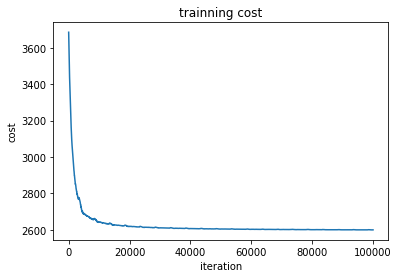

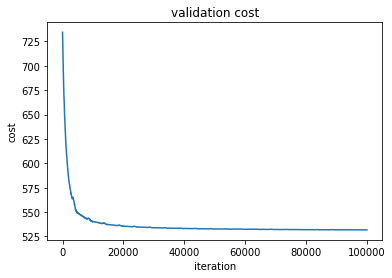

In [6]:
batch_alg_sto(train_x, train_y, val_x, val_y, vary_eps=True)